# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

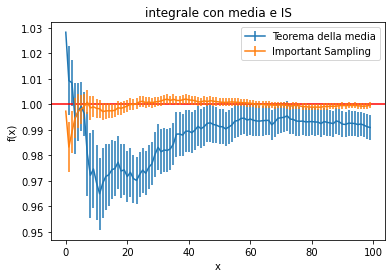

In [33]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x, f, error = np.loadtxt("ex2.1/out.dat", usecols=(0,1,2), unpack='true')
x1, f1, error1 = np.loadtxt("ex2.1/out.dat", usecols=(0,3,4), unpack='true')

plt.errorbar(x,f,yerr=error, label='Teorema della media')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('integrale con media e IS')
plt.axhline(y=1, color='r', linestyle='-')

plt.errorbar(x1,f1,yerr=error1, label='Important Sampling')
plt.legend()
plt.show()

Come si può vedere entrambi gli integrali convergono, ma l'incertezza dell'integrale svolto con l'important sampling viene decisamente più piccola rispetto all'altra.
Le medie sono state svolte entrambe con 100 blocchi da 100 step ciascuno.

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

optimized parameter for discrete RW: 0.988926
parameters uncertainty for discrete RW: 0.002194
optimized parameter for continuous RW:  1.006025
parameters uncertainty for continuous RW: 0.001856


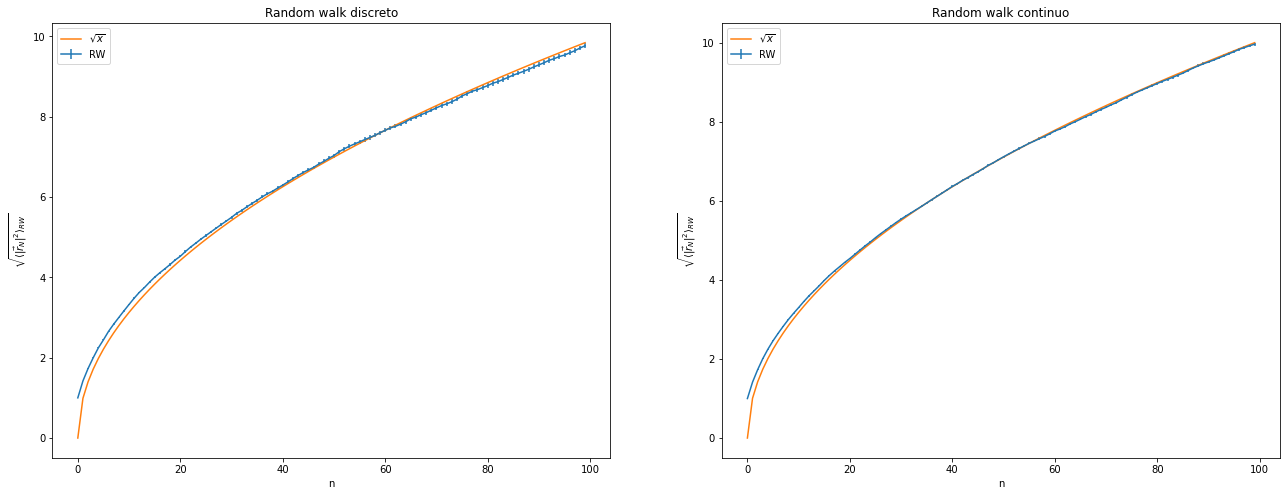

In [37]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

def rad(x, a):
        return a*np.sqrt(x)

x, f , error= np.loadtxt("ex2.2/out1.dat", usecols=(0,1,2),unpack='true')
x1, f1, error1 = np.loadtxt("ex2.2/out3.dat", usecols=(0,1,2), unpack='true')


fig, [ax0, ax1] = plt.subplots(1, 2, figsize  =(22, 8))

ax0.errorbar(x,f,yerr=error, label='RW')
ax1.errorbar(x,f1,yerr=error1, label='RW')

p_opt, p_cov = curve_fit(rad, x, f)
y_fit = rad(x,p_opt[0])
ax0.plot(x, y_fit, label="$\sqrt{x}$")

p_opt1, p_cov1 = curve_fit(rad, x, f1)
y_fit = rad(x,p_opt1[0])
ax1.plot(x, y_fit, label="$\sqrt{x}$")



ax0.set_title('Random walk discreto')
ax1.set_title('Random walk continuo')

for i in range(2):
    globals()['ax'+str(i)].set_xlabel('n')
    globals()['ax'+str(i)].set_ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$')
    globals()['ax'+str(i)].legend()

print("optimized parameter for discrete RW: %f" % (p_opt[0]))
print("parameters uncertainty for discrete RW: %f" % (np.sqrt(np.diagonal(p_cov))))
print("optimized parameter for continuous RW:  %f" % (p_opt1[0]))
print("parameters uncertainty for continuous RW: %f" % (np.sqrt(np.diagonal(p_cov1))))

plt.show()


Entrambe le funzioni sono compatibili con la radice quadrata con coefficente 1.
I valori sono stati ottenuti con una media a blocchi su 100 blocchi da 100 step e per ogni step sono stati fatti 100 passi di random walk.
Per il random walk continuo, per ottenere una distribuzione uniforme dell'angolo sulla sfera era necessario campionare $\phi$ in modo uniforme e $sin(\theta)$ in modo uniforme. Quest' ultimo in particolare è stato fatto con l'inversione della cumulativa.